# Univariate Linear Regression

The dataset was obtained from https://medium.com/we-are-orb/linear-regression-in-python-without-scikit-learn-50aef4b8d122.
We're using univariate linear regression to predict the `y` value, given the input `x` value. This model assumes that the data is linear, and in this case, forms a line.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'Scatter plot for X and Y coordinates')

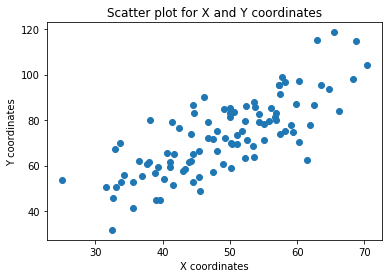

In [33]:
# read data and parse it
data = np.genfromtxt('./datasets/univariate_linear_regression.csv', delimiter=',')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
ones = np.ones((x.shape[0], 1))
# another column with all ones is concatenated to x to make it easier
#  for computing inner products
x = np.concatenate([ones, x], 1)
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.scatter(data[:, 0].reshape(-1, 1), y)
plt.title('Scatter plot for X and Y coordinates')

In [34]:
# Hyperparameters
epochs = 700 # number of time steps
learning_rate = 0.000001 # sensitivity between time steps

In [43]:
# estimates are of the form (m, b) in y = mx + b
def calculateError(x, y, estimates):
    y_hat = x @ estimates.T # estimator for y value
    return ((y - y_hat) ** 2).mean() # MSE error between y and y_hat

# Gradient descent algorithm to traverse along the instantaneous decrease
#   of error. This implementation assumes that the data is linear.
def gradientDescent(x, y, estimates, learning_rate, epochs):
    error = np.zeros(epochs)
    for epoch in range(epochs):
        y_hat = x @ estimates.T
        # instantaneous increase in error = 2 * x_i * (y - y_hat)
        change = (2 * x * (y - y_hat)).mean(axis=0)
        # gradient descent step
        estimates = estimates + learning_rate * change
        error[epoch] = calculateError(x, y, estimates)
    return (estimates, error)

Estimates:  [[1.00912983 1.44573614]]


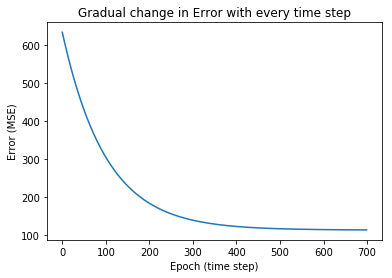

In [42]:
# Starting out with m = 1, b = 1
estimates = np.ones((1, 2))
estimates, error = gradientDescent(x, y, estimates, learning_rate, epochs)
print("Estimates: ", estimates)
plt.xlabel('Epoch (time step)')
plt.ylabel('Error (MSE)')
plt.title('Gradual change in Error with every time step')
plt.plot(np.arange(epochs), error)

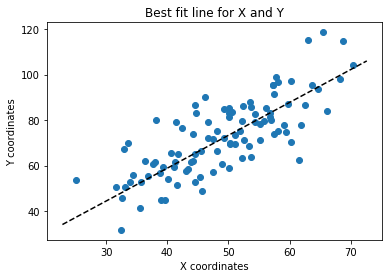

In [45]:
plt.cla()
plt.scatter(data[:, 0].reshape(-1, 1), y)
plt.title('Best fit line for X and Y')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = estimates[0][0] + estimates[0][1] * x_vals #the line equation
plt.plot(x_vals, y_vals, 'k--')
plt.savefig('result-plots/univariate_linear_regression.svg')